In [1]:
library(tidyverse)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [37]:
dfa_grp1<-read_csv('taxa1_inds.csv',show_col_types = FALSE)
dfa_grp2<-read_csv('taxa2_inds.csv',show_col_types = FALSE)
dfa_grp3<-read_csv('taxa3_inds.csv',show_col_types = FALSE)
dfa_grp4<-read_csv('taxa4_inds.csv',show_col_types = FALSE)

New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`


In [39]:
ind_tab<-read.table('/hb/scratch/jbos/combined_snps/all_taxa_int.fam')

In [64]:
ind_names<-paste(ind_tab[,1],'_',ind_tab[,2],sep="")

In [65]:
admix_tab<-read.table('/hb/scratch/jbos/combined_snps/all_taxa_int.4.Q')
colnames(admix_tab)<-c('grp1','grp2','grp3','grp4')

In [66]:
admix_tab<-cbind(ind_names,admix_tab)

In [67]:
max_frac<-function(admix_row){
    x<-names(admix_row[2:5])[admix_row[2:5]==max(admix_row[2:5])]
    return(x)
    }

In [68]:
admix_tab$main_frac<-apply(admix_tab,MARGIN=1,FUN=max_frac)

In [69]:
admix_grp1<-admix_tab[admix_tab$main_frac=='grp1',]
admix_grp2<-admix_tab[admix_tab$main_frac=='grp2',]
admix_grp3<-admix_tab[admix_tab$main_frac=='grp3',]
admix_grp4<-admix_tab[admix_tab$main_frac=='grp4',]

In [76]:
table(admix_grp1$ind_names %in% dfa_grp1$x)
table(admix_grp1$ind_names %in% dfa_grp2$x)
table(admix_grp1$ind_names %in% dfa_grp3$x)
table(admix_grp1$ind_names %in% dfa_grp4$x)


FALSE 
   71 


FALSE 
   71 


FALSE 
   71 


FALSE  TRUE 
    5    66 

In [77]:
table(admix_grp2$ind_names %in% dfa_grp1$x)
table(admix_grp2$ind_names %in% dfa_grp2$x)
table(admix_grp2$ind_names %in% dfa_grp3$x)
table(admix_grp2$ind_names %in% dfa_grp4$x)


FALSE 
   66 


FALSE 
   66 


FALSE  TRUE 
    9    57 


FALSE  TRUE 
   65     1 

In [78]:
table(admix_grp3$ind_names %in% dfa_grp1$x)
table(admix_grp3$ind_names %in% dfa_grp2$x)
table(admix_grp3$ind_names %in% dfa_grp3$x)
table(admix_grp3$ind_names %in% dfa_grp4$x)


FALSE  TRUE 
   18   124 


FALSE 
  142 


FALSE  TRUE 
  141     1 


FALSE 
  142 

In [79]:
table(admix_grp4$ind_names %in% dfa_grp1$x)
table(admix_grp4$ind_names %in% dfa_grp2$x)
table(admix_grp4$ind_names %in% dfa_grp3$x)
table(admix_grp4$ind_names %in% dfa_grp4$x)


FALSE 
   91 


FALSE  TRUE 
   18    73 


FALSE 
   91 


FALSE  TRUE 
   90     1 

In [80]:
colnames(admix_tab)<-c('ind_names','grp4','grp3','grp1','grp2','main_frac')

In [81]:
admix_tab<-admix_tab[order(admix_tab$main_frac),]

In [82]:
admix_long<-pivot_longer(admix_tab,cols=c('grp1','grp2','grp3','grp4'),names_to='group')

In [83]:
admix_long$ind_names<-factor(admix_long$ind_names, levels = unique(admix_long$ind_names)) 

In [89]:
plot_colors <- c("#440154FF", "#31688EFF", "#35B779FF", "#FDE725FF")
adplot<- ggplot(aes(x = ind_names, y=value, fill=group),data=admix_long)+
  geom_col(position = position_fill()+
  scale_fill_manual(values = plot_colors)+ 
  theme(plot.title = element_text(size = 18),
      axis.title.y = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.text.y = element_text(size = 12))
ggsave(filename="admixture_plot.png",plot= adplot,dpi=1200,units='in',width=8,height=4)

ERROR: Error in parse(text = x, srcfile = src): <text>:9:1: unexpected symbol
8:       axis.text.y = element_text(size = 12))
9: ggsave
   ^


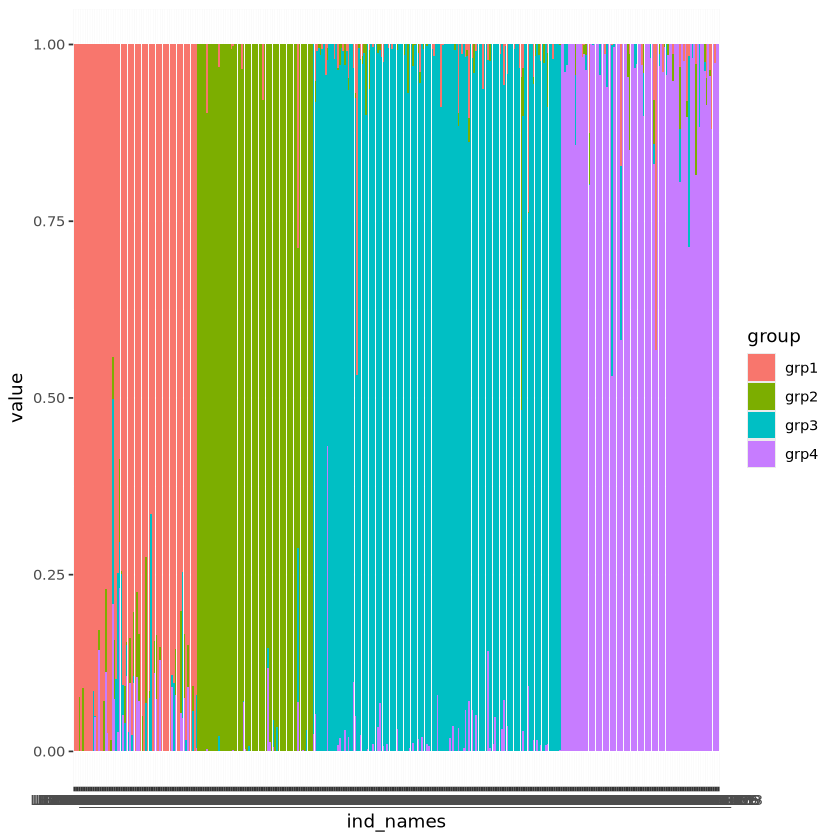

In [33]:
adplot